# Techcareer.net Veri Bilimi - Ödev 2
#### Hazırlayan: Burak KAPLAN

### Kütüphanelerin Eklenmesi

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from datetime import datetime

### Verinin Hazırlanması 

In [2]:
# Veri okuması
df1 = pd.read_csv("Veriseti1.csv")
df2 = pd.read_csv("Veriseti2.csv")
df3 = pd.read_csv("Veriseti3.csv")
# Eğitim yapılacak olan Verinin birleştirilmesi
df = pd.concat([df2,df1],axis=0,ignore_index=True)
# Verinin düzenlenmesi
df = df.drop(columns=["Unnamed: 0"],axis=1)
df3 = df3.drop(columns=["Unnamed: 0"],axis=1)
df =df.sort_index()
# Date verisindeki saat i ayırmak
df['date'] = pd.to_datetime(df['date'])
df["Hour"] = df["date"].dt.hour
df3['date'] = pd.to_datetime(df3['date'])
df3["Hour"] = df3["date"].dt.hour
# Gün verisini eklemek
df["Day"] = df["date"].dt.day
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['date'].dt.weekday.map(dw_mapping)
df = df.drop("Day",axis=1)
df3["Day"] = df3["date"].dt.day
df3['day_of_week_name']=df3['date'].dt.weekday.map(dw_mapping)
df3 = df3.drop("Day",axis=1)
# Gün verisinin categorize edilmesi
df["day_of_week_name_cat"] = df["day_of_week_name"].astype("category").cat.codes
df3["day_of_week_name_cat"] = df3["day_of_week_name"].astype("category").cat.codes
# Gün isimlerinin düşürülmesi
df = df.drop("day_of_week_name",axis=1)
df["HumidityRatio * Temperature"] = df["Temperature"]*df["HumidityRatio"]
df3 = df3.drop("day_of_week_name",axis=1)
df3["HumidityRatio * Temperature"] = df3["Temperature"]*df3["HumidityRatio"]
# Veriye kapı durumu eklenmesi
df["Door Status"] = np.zeros_like(df["Occupancy"])
df3["Door Status"] = np.ones_like(df3["Occupancy"])
# date sütununun düşürülmesi
df = df.drop("date",axis=1)
df3 = df3.drop("date",axis=1)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hour,day_of_week_name_cat,HumidityRatio * Temperature,Door Status
0,23.7000,26.2720,585.200000,749.200000,0.004764,1,14,1,0.112911,0
1,23.7180,26.2900,578.400000,760.400000,0.004773,1,14,1,0.113198,0
2,23.7300,26.2300,572.666667,769.666667,0.004765,1,14,1,0.113077,0
3,23.7225,26.1250,493.750000,774.750000,0.004744,1,14,1,0.112534,0
4,23.7540,26.2000,488.600000,779.000000,0.004767,1,14,1,0.113226,0
...,...,...,...,...,...,...,...,...,...,...
10803,21.0500,36.0975,433.000000,787.250000,0.005579,1,9,5,0.117432,0
10804,21.0500,35.9950,433.000000,789.500000,0.005563,1,9,5,0.117095,0
10805,21.1000,36.0950,433.000000,798.500000,0.005596,1,9,5,0.118068,0
10806,21.1000,36.2600,433.000000,820.333333,0.005621,1,9,5,0.118613,0


### Verinin Görselleştirilmesi

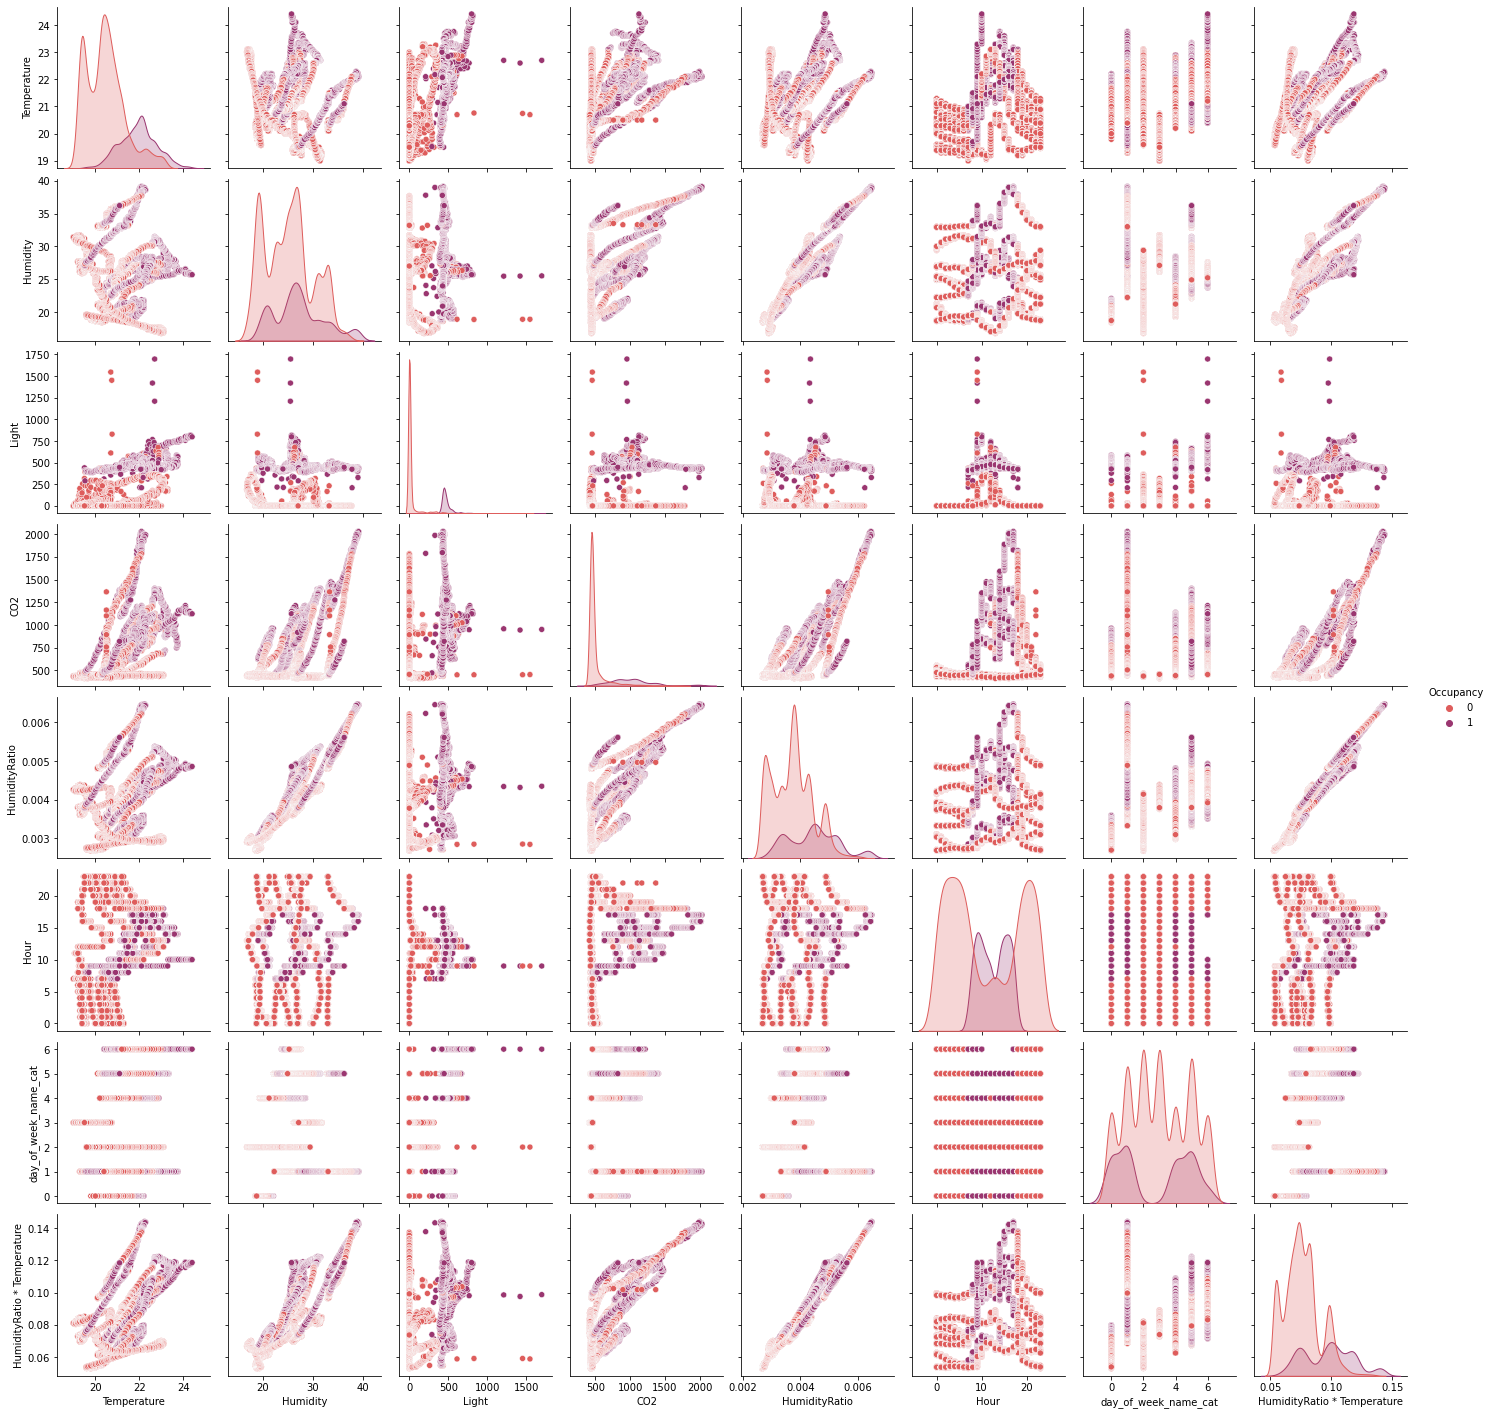

In [48]:
# Pair Plot çizimi
sns.pairplot(data=df.drop("Door Status",axis=1),hue="Occupancy",height=2.5,palette="flare");

(array([8107.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2701.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

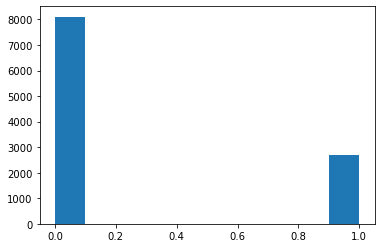

In [75]:
plt.hist(x=df["Occupancy"])

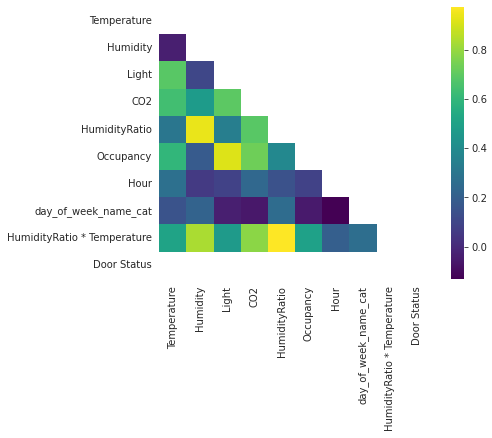

In [3]:
# Corrolation heatmap çizimi
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(df.corr(), mask=mask,  square=True,cmap="viridis")

### Model ve Hyperparametre Tuning

In [51]:
# Random Forest Method
from sklearn.ensemble import RandomForestClassifier
# Hyperparametre tuning (model için en iyi değerleri bulmayı amaçlayan yöntem)
from sklearn.model_selection import GridSearchCV
# X-Y Seperation(Modele verilecek olan X ve Y değerlerinin ayrımı)
X = df.drop("Occupancy",axis=1).values
y = df["Occupancy"].values

# Train-test split(Train edilecek ve test edilecek X ve Y değerlerinin ayrımı)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model(Model Oluşturma)
rf = RandomForestClassifier()

# Random Forest Modelinin alabileceği parametrelerin görülmesi
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
# GridSearch için verilecek değerlerin belirlenmesi
# Bootstrap değeri
bootstrap = [True,False]
# max_depth değeri (karar ağacında en fazla kaç adet dal olacağı değeri)
max_depth = np.arange(1,20,2)
# max_features (karar ağacının her dalında değerlendirilecek özellik sayısı)
max_features = ["auto","sqrt"]
# max_samples (her dalda en fazla alınacak örnek sayısı)
max_samples = np.arange(0.1,1,0.1)
# n_estimators (ağaç sayısı)
n_estimators = np.arange(1,21,2)
# değişecek parametrelerin tanımlanması
params_rf = {"bootstrap":bootstrap,
             "max_depth" : max_depth,
             "max_samples" : max_samples,
             "max_features" : max_features,
             "n_estimators" : n_estimators}

# Grid modelin oluşturulması
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring="accuracy", cv=3)
# Grid modelin fit edilmesi
grid_rf.fit(X=X_train, y=y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

Accuracy score = 0.9870490286771508


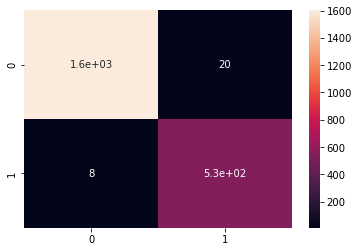

In [53]:
# Best model atama
best_model_random_forest = grid_rf.best_estimator_
# Tahmin değerinin belirlenmesi
y_pred=best_model_random_forest.predict(X=X_test)
# Gerçek sonuç ile tahmin değerinin karşılaştırılması
sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_pred),annot=True)
print("Accuracy score =",accuracy_score(y_true=y_test,y_pred=y_pred))

In [54]:
# GradientBoosting model 
from sklearn.ensemble import GradientBoostingClassifier
# model oluşturma
gbm = GradientBoostingClassifier()
# model parametrelerin gözlenmesi
gbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [55]:
# GridSearch için verilecek değerlerin belirlenmesi
# max_depth değeri (karar ağacında en fazla kaç adet dal olacağı değeri)
max_depth = np.arange(1,20,2)
# max_features (karar ağacının her dalında değerlendirilecek özellik sayısı)
max_features = ["auto","sqrt"]
# n_estimators (ağaç sayısı)
n_estimators = np.arange(1,21,2)
# learning rate 
learning_rate = np.arange(0.1,1,0.1)
# değişecek parametrelerin tanımlanması
params_gbm = {"max_depth" : max_depth,
             "max_features" : max_features,
             "n_estimators" : n_estimators,
            "learning_rate":learning_rate}

# Grid modelin oluşturulması
grid_gbm = GridSearchCV(estimator=gbm, param_grid=params_gbm, scoring="accuracy", cv=3)
# Grid modelin fit edilmesi
grid_gbm.fit(X=X_train, y=y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

Accuracy score = 0.990286771507863


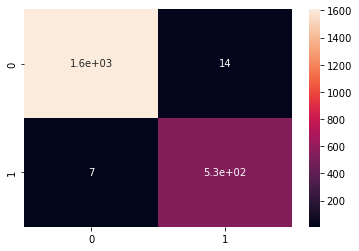

In [56]:
# Best model atama
best_model_gradient_boosting = grid_gbm.best_estimator_
# Tahmin değerinin belirlenmesi
y_pred=best_model_gradient_boosting.predict(X=X_test)
# Gerçek sonuç ile tahmin değerinin karşılaştırılması
sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_pred),annot=True)
print("Accuracy score =",accuracy_score(y_true=y_test,y_pred=y_pred))

In [57]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Modelin Oluşturulması
lg = LogisticRegression()
# Model parametrelerinin gözlenmesi
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [70]:
# GridSearch için verilecek değerlerin belirlenmesi
# Penalty değeri
penalty = ["l1","l2"]
# c değeri 
c = np.logspace(-3,3,10)
# değişecek parametrelerin tanımlanması
params_lg = {"penalty":penalty,
             "C" : c}
# Standart Scaler ile veriyi standart distribution'a getirme
sc = StandardScaler().fit(X_train)
# Grid modelin oluşturulması
grid_lg = GridSearchCV(estimator=lg, param_grid=params_lg, scoring="accuracy", cv=3)
# Grid modelin fit edilmesi
grid_lg.fit(X=sc.transform(X_train), y=y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Accuracy score = 0.982886216466235


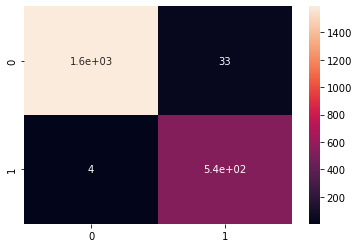

In [71]:
# Best model atama
best_model_logistic_regression = grid_lg.best_estimator_
# Tahmin değerinin belirlenmesi
y_pred=best_model_logistic_regression.predict(X=sc.transform(X_test))
# Gerçek sonuç ile tahmin değerinin karşılaştırılması
sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_pred),annot=True)
print("Accuracy score =",accuracy_score(y_true=y_test,y_pred=y_pred))

### Veri Seti 3 İle Deneme 

Confusion_matrix = [[7646   57]
 [  11 2038]]
Accuracy score = 0.9930270713699754


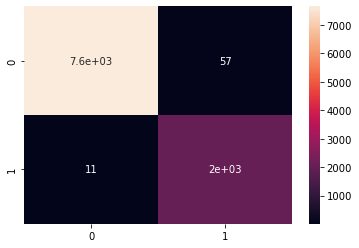

In [72]:
# Veri seti 3 ile deneme (Random Forest)
# Tahmin değerinin belirlenmesi
y_pred=best_model_random_forest.predict(X=df3.drop("Occupancy",axis=1))
# Gerçek sonuç ile tahmin değerinin karşılaştırılması
# Confusion Matrix yazdırılması
print("Confusion_matrix =", confusion_matrix(y_true=df3["Occupancy"],y_pred=y_pred))
# Confusion Matrix Heatmap Çizdirilmesi
sns.heatmap(confusion_matrix(y_true=df3["Occupancy"],y_pred=y_pred),annot=True)
# Accuracy score yazdırılması
print("Accuracy score =",accuracy_score(y_true=df3["Occupancy"],y_pred=y_pred))

Confusion_matrix = [[7622   81]
 [  11 2038]]
Accuracy score = 0.9905660377358491


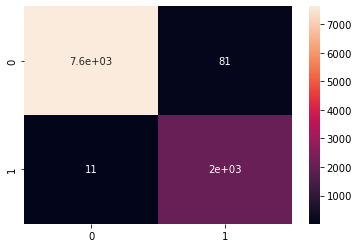

In [73]:
# Veri seti 3 ile deneme (Gradient Boosting)
# Tahmin değerinin belirlenmesi
y_pred=best_model_gradient_boosting.predict(X=df3.drop("Occupancy",axis=1))
# Gerçek sonuç ile tahmin değerinin karşılaştırılması
# Confusion Matrix yazdırılması
print("Confusion_matrix =", confusion_matrix(y_true=df3["Occupancy"],y_pred=y_pred))
# Confusion Matrix Heatmap Çizdirilmesi
sns.heatmap(confusion_matrix(y_true=df3["Occupancy"],y_pred=y_pred),annot=True)
# Accuracy score yazdırılması
print("Accuracy score =",accuracy_score(y_true=df3["Occupancy"],y_pred=y_pred))

Confusion_matrix = [[7637   66]
 [   9 2040]]
Accuracy score = 0.9923092698933552


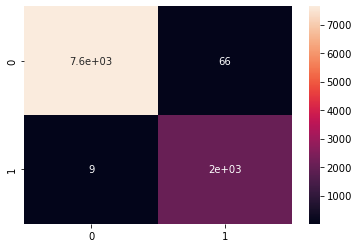

In [74]:
# Veri seti 3 ile deneme (Logistic Regression)
# Tahmin değerinin belirlenmesi
y_pred=best_model_logistic_regression.predict(X=sc.transform(df3.drop("Occupancy",axis=1)))
# Gerçek sonuç ile tahmin değerinin karşılaştırılması
# Confusion Matrix yazdırılması
print("Confusion_matrix =", confusion_matrix(y_true=df3["Occupancy"],y_pred=y_pred))
# Confusion Matrix Heatmap Çizdirilmesi
sns.heatmap(confusion_matrix(y_true=df3["Occupancy"],y_pred=y_pred),annot=True)
# Accuracy score yazdırılması
print("Accuracy score =",accuracy_score(y_true=df3["Occupancy"],y_pred=y_pred))